<a href="https://colab.research.google.com/github/Justin-Polchies/Python-Projects/blob/School-Based-Projects/Justin_Polchies_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Final Project </center>

*   **Author: Justin Polchies**
*   **Class: COS 422-522 Computing for Data Science**


1. **Problem Definition**:   
2. **Data Gathering**: 
3. **Data Wrangling**: 
4. **Graphs and Visualizations**: 



# 1.0. Problem Definition

# 2.0. Data Gathering and Imports


In [1]:
#Needed Import to work with imported data.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Importing the needed datasets.
url_FFC = '/content/ff_data_2.xlsx'
url_PDD = '/content/statistic_id1070627_us-law-enforcement-officer-deaths-1786-2022-by-cause.xlsx'
url_FFD = '/content/statistic_id376714_us-firefighter-deaths-1977-2021.xlsx'
url_PD = '/content/pd_data.xlsx'

#Making those dataset usable by putting them into a Dataframe.
df_ffc = pd.read_excel(url_FFC)
df_ffd = pd.read_excel(url_FFD)
df_pdd = pd.read_excel(url_PDD)
df_pd = pd.read_excel(url_PD)

The Next four lines of code is in place just to check on the setup of the data in the dataframe.

In [ ]:
df_ffc.head()

In [ ]:
df_ffd.head()

In [ ]:
df_pdd.head()

In [ ]:
df_pd.head()

# 3.0. Data Wrangling

In the first section I am going to take at look at what is missing data with its percentage.

In [2]:
#Checking the missing percent for Firefighter death. Since there is no missing data for this dataset, I moved on to the next dataset.
pd.DataFrame({'Missing Values': df_ffd.isna().sum(), '% Missing': (df_ffd.isna().sum()/df_ffd.shape[0] * 100).round(2)})

NameError: ignored

In [ ]:
#This is the percentage of missing data for Firefighting Causes. This has a few items with missing data.
pd.DataFrame({'Missing Values': df_ffc.isna().sum(), '% Missing': (df_ffc.isna().sum()/df_ffc.shape[0] * 100).round(2)})

,Missing Values,% Missing
First name,0,0.00
Last name,0,0.00
Middle name,247,9.51
Age,361,13.90
Rank,7,0.27
Classification,3,0.12
Incident date,1,0.04
Date of death,0,0.00
Cause of death,13,0.50
Nature of death,7,0.27


In [ ]:
#Lets take a look at the data that has the missing information.
df_ffc[df_ffc.isnull().any(axis=1)]

,First name,Last name,Middle name,Age,Rank,Classification,Incident date,Date of death,Cause of death,Nature of death,Activity,Emergency,Duty,Property type
4,Gary,"Bankert, Sr",Lynn,37.0,Firefighter,Volunteer,2000-01-15,2000-01-15,Caught or Trapped,Drowning,Other,No,Training,NaN
6,Ernest,Young,John,52.0,Firefighter/Trustee,Volunteer,2000-01-16,2000-01-17,Fall,Trauma,In-Station Duties,No,Other On-Duty,NaN
28,Michael,Queen,Russell,30.0,Chief,Volunteer,2000-03-28,2000-03-28,Struck By,Trauma,In-Station Duties,No,Other On-Duty,NaN
30,Mike,Shortt,,44.0,Fire Chief,Career,2000-03-15,2000-03-31,Stress/Overexertion,Heart Attack,Other,No,Training,NaN
43,Arthur,"Nilson, Jr.",E.,75.0,Company Member,Volunteer,2000-05-13,2000-05-13,Stress/Overexertion,Heart Attack,Support,No,Other On-Duty,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,Giovanni,Ciancio,NaN,55.0,Driver/Engineer,Career,2021-07-16,2021-10-21,Exposure,Covid-19,EMS/Patient Care,Yes,On-Scene Non-Fire,Residential
2575,Wesley,Vanderver,NaN,86.0,Captain,Volunteer,2021-10-27,2021-10-27,Stress/Overexertion,Heart Attack,Pump Operations,Yes,On-Scene Fire,Residential
2584,Scott,Williams,NaN,46.0,Firefighter/Paramedic,Career,2021-11-20,2021-11-21,Stress/Overexertion,Heart Attack,Other,No,Other On-Duty,Store/Office
2585,Kasey,Callwood,NaN,31.0,Firefighter,Career,2021-11-22,2021-11-22,Vehicle Collision - Includes Aircraft,Trauma,Riding Vehicle/Apparatus,No,Training,Street/Road


In [ ]:
#The percentage of missing data for the Police department Deaths with causes.
pd.DataFrame({'Missing Values': df_pdd.isna().sum(), '% Missing': (df_pdd.isna().sum()/df_pdd.shape[0] * 100).round(2)})

,Missing Values,% Missing
Year,0,0.00
Gunfire*,40,16.88
Assault/stabbing,40,16.88
9/11 attack and related illness,217,91.56
Covid-19**,234,98.73
Other***,67,28.27


In [ ]:
#Looking at the missing data. Do to the nature of the structure of this dataframe it will be easy to fix/correct.
df_pdd[df_pdd.isnull().any(axis=1)]

,Year,Gunfire*,Assault/stabbing,9/11 attack and related illness,Covid-19**,Other***
0,1786,NaN,NaN,NaN,NaN,1.0
1,1787,NaN,NaN,NaN,NaN,NaN
2,1788,NaN,NaN,NaN,NaN,NaN
3,1789,NaN,NaN,NaN,NaN,NaN
4,1790,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
230,2016,64.0,4.0,29.0,NaN,84.0
231,2017,45.0,7.0,48.0,NaN,86.0
232,2018,52.0,4.0,46.0,NaN,85.0
233,2019,49.0,4.0,28.0,NaN,74.0


In [ ]:
pd.DataFrame({'Missing Values': df_pdd.isna().sum(), '% Missing': (df_pdd.isna().sum()/df_pdd.shape[0] * 100).round(2)})

,Missing Values,% Missing
Year,0,0.00
Gunfire*,40,16.88
Assault/stabbing,40,16.88
9/11 attack and related illness,217,91.56
Covid-19**,234,98.73
Other***,67,28.27


In [ ]:
pd.DataFrame({'Missing Values': df_pd.isna().sum(), '% Missing': (df_pd.isna().sum()/df_pd.shape[0] * 100).round(2)})

,Missing Values,% Missing
person,0,0.0
dept,0,0.0
eow,0,0.0
cause,0,0.0
cause_short,0,0.0
date,0,0.0
year,0,0.0
canine,0,0.0
dept_name,0,0.0
state,0,0.0


  In this section of the notebook, after looking at the missing data and what information was inside. It was decide to remove unneeded columns. With the columns being removed a new dataframe should of been created to keep the old dataframe intacted for future usage.

In [ ]:
#Removed unwanted columns.
df_ffc_2 = df_ffc.drop(columns=['First name','Last name','Middle name','Rank','Classification','Activity','Emergency','Duty','Property type'])

In [ ]:
#Replace string values with numeral values to help with making visuals.
df_ffc_2.replace({'Asphyxiation': 0, 'Burns': 1, 'Cerebrovascular Accident': 2, 'Covid-19':3,
                'Crushed': 4, 'Drowning': 5, 'Electrocution': 6, 'Heart Attack': 7, 'Heat Exhaustion': 8, 
                'Other': 9, 'Trauma':10, 'Unknown':11, 'Violence':12}, inplace=True)

In [ ]:
#Keeping an eye on the dataframe.
df_ffc_2.head()

,Age,Incident date,Date of death,Cause of death,Nature of death
0,64.0,1999-12-31,2000-01-01,Stress/Overexertion,2.0
1,57.0,2000-01-08,2000-01-08,Stress/Overexertion,7.0
2,36.0,2000-01-11,2000-01-11,Stress/Overexertion,7.0
3,58.0,2000-01-11,2000-01-11,Stress/Overexertion,7.0
4,37.0,2000-01-15,2000-01-15,Caught or Trapped,5.0


In [ ]:
#After taking a good look into the data for the dataframe, it was decide to fill all nan/null values with 0
#This was the logical choice.
df_pdd = df_pdd.fillna(0)
df_pdd.head()

,Year,Gunfire*,Assault/stabbing,9/11 attack and related illness,Covid-19**,Other***
0,1786,0.0,0.0,0.0,0.0,1.0
1,1787,0.0,0.0,0.0,0.0,0.0
2,1788,0.0,0.0,0.0,0.0,0.0
3,1789,0.0,0.0,0.0,0.0,0.0
4,1790,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_pdd.dtypes.to_frame(name='Data type')

,Data type
Year,int64
Gunfire*,float64
Assault/stabbing,float64
9/11 attack and related illness,float64
Covid-19**,float64
Other***,float64


In [ ]:
#To the median value for Age to fill in the gaps.
df_ffc['Age'].fillna(df_ffc['Age'].median(), inplace=True)

# 4.0. Graphs and Visualizations.

In this first graph we are graphing the police yearly line of duty Deaths. For the x-axis the year was used while the y-axis consist of each cause of death. A line graph was used to properly display each difference.

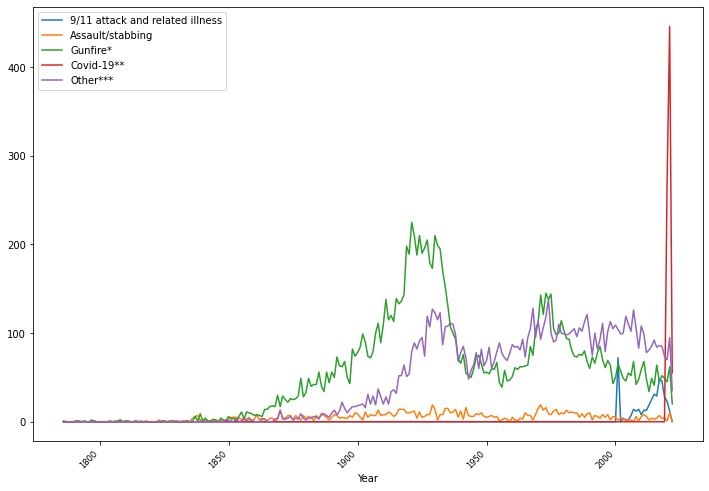

In [ ]:
#An improvement that will be later added is an increase of tick lines for the x-axis.
df_pdd[['Year','9/11 attack and related illness','Assault/stabbing','Gunfire*','Covid-19**', 'Other***']].plot(x='Year', kind='line',figsize=(12,8))
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='small',
)
plt.show()

The next line of code was used to get a rough idea of the age range with how many record are within that age.

In [ ]:
df_ffc_2['Age'].value_counts()

54.0    69
49.0    67
48.0    64
51.0    63
46.0    63
        ..
95.0     1
91.0     1
83.0     1
88.0     1
89.0     1
Name: Age, Length: 77, dtype: int64

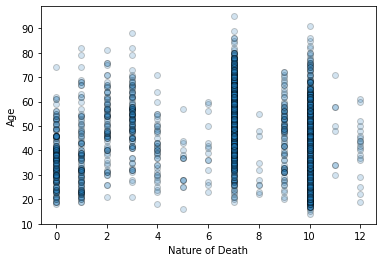

In [ ]:
#df_ffc.plot.scatter(x='Nature of death', y='Age')
#Could not think of a better graph to use at the time of coding this.
colors = np.random.random((2598,3))
plt.scatter(df_ffc_2['Nature of death'], df_ffc_2['Age'], alpha=0.2,edgecolor='black')
plt.xlabel('Nature of Death')
plt.ylabel('Age')
plt.show()

In [ ]:
df_pd.head()

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC


In [ ]:
df_pd = df_pd.drop(columns=['person', 'dept','cause','eow', 'canine', 'dept_name'])

In [ ]:
newdf = df_pd['cause_short'].value_counts()
new_DF = pd.DataFrame(newdf).reset_index()
new_DF

,index,cause_short
0,Gunfire,12067
1,Automobile accident,2348
2,Motorcycle accident,1134
3,Heart attack,977
4,Vehicular assault,888
5,Struck by vehicle,868
6,Vehicle pursuit,627
7,Assault,613
8,Gunfire (Accidental),604
9,Stabbed,465


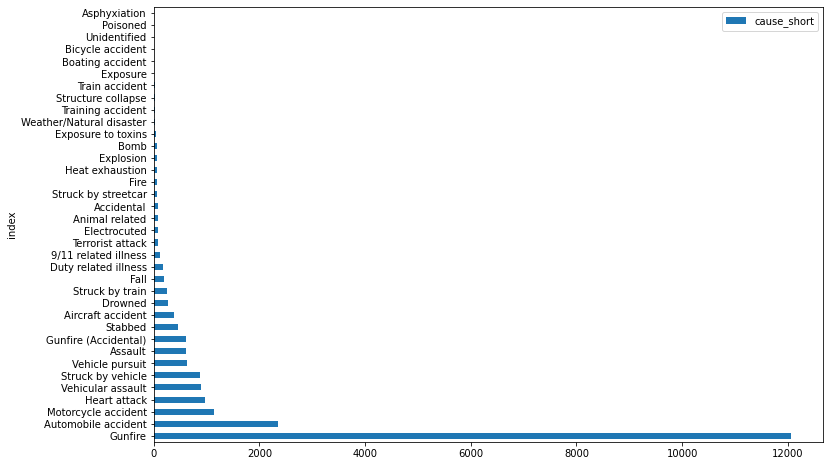

In [ ]:
new_DF.plot(x='index', kind='barh',figsize=(12,8))
#plt.hist(df_pd['cause_short'].value_counts())

In [ ]:
#Created a new column from getting the year out of the datetime column 'Date of Death'.
#To get a idea of a yearly total on overall deaths, to see if there is a pattern.
#Farther research into those years could indicate new training or better protective equipment
#this may lead into individuals taking more risk.
df_ffc['Year'] =df_ffc['Date of death'].dt.year

In [ ]:
df_ffc_3 = df_ffc.drop(columns=['First name', 'Age', 'Date of death', 'Incident date', 'Last name','Middle name','Rank','Classification','Activity','Emergency','Duty','Property type'])

In [ ]:
df_df = df_ffc_3.groupby('Nature of death').count()
df_df.reset_index(inplace=True)
df_df.rename(columns = {'Cause of death':'Total'}, inplace=True)
df_df

,Nature of death,Total,Year
0,Asphyxiation,160,160
1,Burns,101,101
2,Cerebrovascular Accident,77,78
3,Covid-19,99,99
4,Crushed,44,44
5,Drowning,14,14
6,Electrocution,13,14
7,Heart Attack,998,1001
8,Heat Exhaustion,10,10
9,Other,88,90


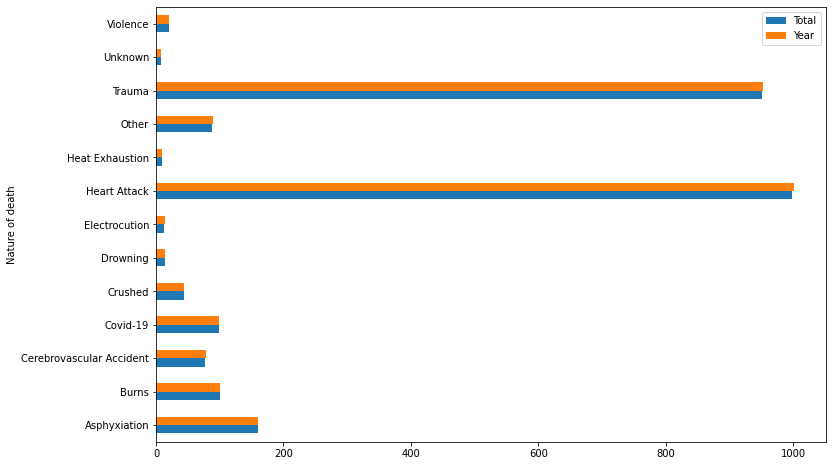

In [ ]:
df_df.plot(x='Nature of death', kind='barh',figsize=(12,8))

In [ ]:
df = pd.DataFrame(df_ffc_3.groupby(df_ffc_3['Year'])['Nature of death'].value_counts())
df.rename(columns = {'Nature of death':'Total'}, inplace=True)
df

Total
Year Nature of death                
2000 Heart Attack                 39
     Trauma                       35
     Asphyxiation                  8
     Burns                         7
     Cerebrovascular Accident      4
...                              ...
2021 Cerebrovascular Accident      3
     Crushed                       2
     Electrocution                 1
     Heat Exhaustion               1
     Violence                      1

[194 rows x 1 columns]

In [ ]:
#df.reset_index(inplace=True)
df

Total
Year Nature of death                
2000 Heart Attack                 39
     Trauma                       35
     Asphyxiation                  8
     Burns                         7
     Cerebrovascular Accident      4
...                              ...
2021 Cerebrovascular Accident      3
     Crushed                       2
     Electrocution                 1
     Heat Exhaustion               1
     Violence                      1

[194 rows x 1 columns]

In [ ]:
df_dfnew = pd.DataFrame(df)
df_dfnew

,Year,Nature of death,Total
0,2000,Heart Attack,39
1,2000,Trauma,35
2,2000,Asphyxiation,8
3,2000,Burns,7
4,2000,Cerebrovascular Accident,4
...,...,...,...
189,2021,Cerebrovascular Accident,3
190,2021,Crushed,2
191,2021,Electrocution,1
192,2021,Heat Exhaustion,1


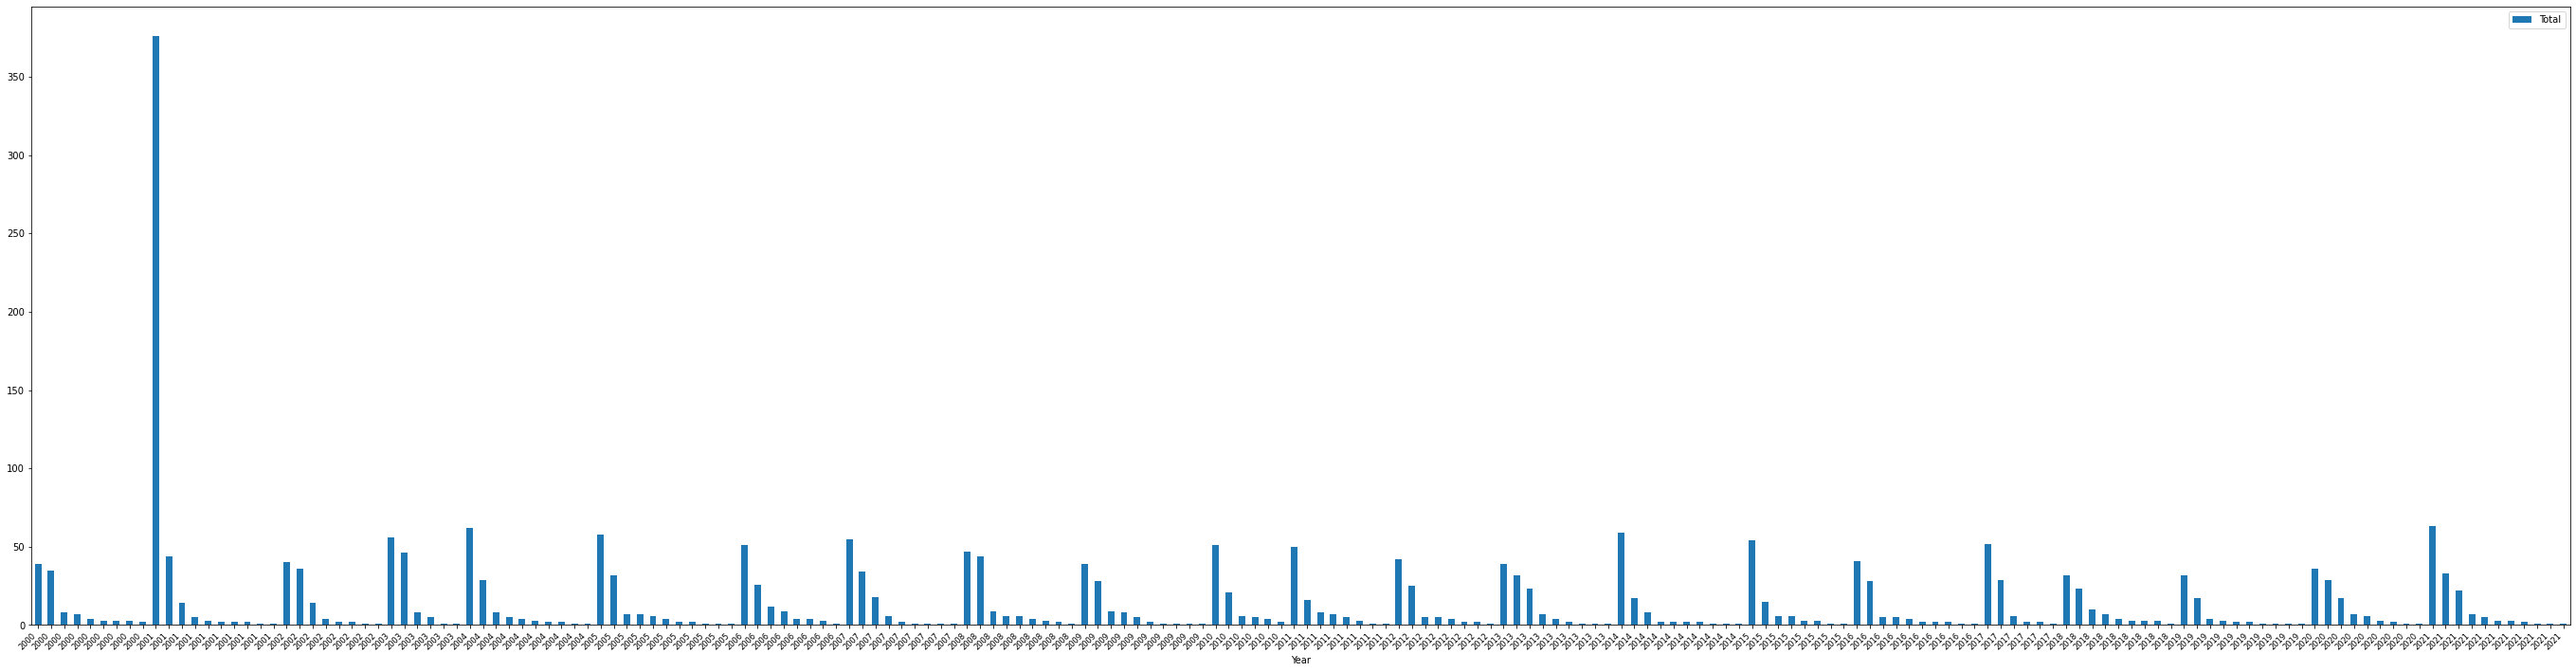

In [ ]:
#Trying to get Year by Year values for each cause of death.
df_dfnew[['Year','Nature of death','Total']].plot(x='Year', kind='bar',figsize=(48,12))
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='small',
)
plt.show()